In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs

In [9]:
X, y = make_blobs(n_samples=1000, n_features=6, centers=6, random_state=42)

## Scaling

In [10]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

## Covariance Matrix

In [11]:
cov = 1/1000 * (X.T @ X)

In [13]:
cov.round(2)

array([[ 1.  , -0.7 , -0.65, -0.33,  0.49, -0.21],
       [-0.7 ,  1.  ,  0.58,  0.24, -0.53, -0.28],
       [-0.65,  0.58,  1.  , -0.18, -0.79, -0.12],
       [-0.33,  0.24, -0.18,  1.  ,  0.41,  0.42],
       [ 0.49, -0.53, -0.79,  0.41,  1.  ,  0.  ],
       [-0.21, -0.28, -0.12,  0.42,  0.  ,  1.  ]])

## Singular Value Decompusition (SVD)

In [14]:
[U, S, V] = np.linalg.svd(cov)

In [16]:
U.round(2)

array([[-0.48, -0.35,  0.  , -0.33,  0.69,  0.22],
       [ 0.49,  0.11, -0.47, -0.51, -0.01,  0.52],
       [ 0.53, -0.12,  0.15,  0.6 ,  0.51,  0.25],
       [-0.03,  0.72, -0.31,  0.  ,  0.48, -0.4 ],
       [-0.49,  0.23, -0.38,  0.49, -0.16,  0.54],
       [-0.06,  0.53,  0.72, -0.19,  0.01,  0.4 ]])

In [17]:
S.round(2)

array([2.88, 1.67, 0.98, 0.26, 0.18, 0.03])

In [18]:
V.round(2)

array([[-0.48,  0.49,  0.53, -0.03, -0.49, -0.06],
       [-0.35,  0.11, -0.12,  0.72,  0.23,  0.53],
       [ 0.  , -0.47,  0.15, -0.31, -0.38,  0.72],
       [-0.33, -0.51,  0.6 ,  0.  ,  0.49, -0.19],
       [ 0.69, -0.01,  0.51,  0.48, -0.16,  0.01],
       [ 0.22,  0.52,  0.25, -0.4 ,  0.54,  0.4 ]])

In [24]:
(U @ U.T).round(2)

array([[ 1.,  0.,  0., -0.,  0., -0.],
       [ 0.,  1.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  1., -0., -0.,  0.],
       [-0., -0., -0.,  1.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  1.,  0.],
       [-0.,  0.,  0.,  0.,  0.,  1.]])

In [26]:
(U**2).sum(axis=1)

array([1., 1., 1., 1., 1., 1.])

In [29]:
U @ np.diag(S) @ V #  = cov matrix ine eşittir.  

array([[ 1.00000000e+00, -7.01453035e-01, -6.53001331e-01,
        -3.28080561e-01,  4.85550808e-01, -2.11706009e-01],
       [-7.01453035e-01,  1.00000000e+00,  5.78420967e-01,
         2.35547144e-01, -5.30984041e-01, -2.79833511e-01],
       [-6.53001331e-01,  5.78420967e-01,  1.00000000e+00,
        -1.84985799e-01, -7.86299498e-01, -1.17863146e-01],
       [-3.28080561e-01,  2.35547144e-01, -1.84985799e-01,
         1.00000000e+00,  4.08520301e-01,  4.17691158e-01],
       [ 4.85550808e-01, -5.30984041e-01, -7.86299498e-01,
         4.08520301e-01,  1.00000000e+00,  7.37711762e-04],
       [-2.11706009e-01, -2.79833511e-01, -1.17863146e-01,
         4.17691158e-01,  7.37711762e-04,  1.00000000e+00]])

## Finding principle components

In [31]:
k = 2 

In [32]:
pca = X @ U[:,:k]

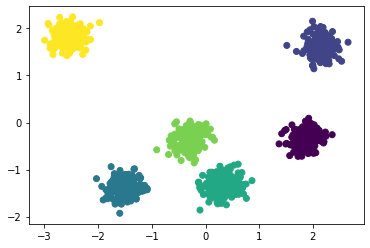

In [36]:
plt.scatter(*pca.T, c=y)

## explaint variance ratio

In [37]:
S # her bir feature ın kendi varyans değeri

array([2.87681072, 1.67127626, 0.97760471, 0.26425551, 0.18438067,
       0.02567213])

In [39]:
np.cumsum(S) / S.sum() 

array([0.47946845, 0.7580145 , 0.92094861, 0.9649912 , 0.99572131,
       1.        ])

# Gerçek dataset ile sklearn PCS uygulaması

In [41]:
from sklearn.decomposition import PCA

In [43]:
df = pd.read_csv("countries of the world.csv")

In [46]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [47]:
df.shape

(227, 20)

In [49]:
X = df.iloc[:,2:]
y = df.iloc[:,0]

In [56]:
X.dtypes

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [62]:
df.iloc[:,2:]=df.iloc[:,2:].apply(lambda x:pd.to_numeric(x.str.replace(',','.')) if x.dtype=='object'else x)

AttributeError: Can only use .str accessor with string values!